<a href="https://colab.research.google.com/github/igors96/Titanic_CRISP_DS/blob/main/Titanic_CRISP_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Problem:
O naufrágio do Titanic aconteceu no dia 15 de abril de 1912, nas águas do Oceano Atlântico, após a colisão em um *iceberg* da embarcação RMS Titanic que saíra de Southampton em direção à Nova York no dia 10. Ao todo, 1502 das 2224 pessoas, entre passageiros e tripulação, vieram a falecer. 


# Business Understanding:
O objetivo da construção do RMS Titanic era fazer com que este navio fosse a maior referência de sua época, especialmente no aspecto do luxo, segurança e nível de engenharia aportado. Foram 4 anos de projeto para idealização, com a promessa de ser "inafundável". Porém, ocorreram relatos de falhas técnicas pela tripulação, além do número de botes salva-vidas ser menor que o número de pessoas, mostrando que detalhes muito importantes sob a questão da segurança passaram despercebidos pela *White Star Line*, empresa operadora do navio.

No que tange às pessoas, é importante trazer à tona o levantamento de seus dados e verificarmos se há alguma relação que seja possível inferir, e que mostre se há um padrão no perfil dos sobreviventes e não-sobreviventes. A seguir serão apresentadas algumas hipóteses, cujas confirmações ou rejeições serão determinadas com o auxílio das ferramentas de Ciência de Dados:

1) Pessoas idosas tiveram menor chance de sobrevivência, dada a ocorrência do naufrágio?

2) A porcentagem de homens sobreviventes é inferior à de mulheres sobreviventes? (Considerando a porcentagem em relação ao número total de homens e ao total de mulheres)

3) O fato de uma pessoa ter parentes/pessoas próximas foi importante para a sua sobrevivência, dado que espera-se um auxílio maior entre as pessoas pela questão sentimental?

4) Pessoas que estavam numa classe menos favorecida dentro da embarcação tiveram menor porcentagem de sobrevivência em relação à quem estava numa classe mais favorecida?

Além de responder estas perguntas, o objetivo deste trabalho é obter um modelo que consiga prever se um passageiro sobreviveu ou não à tragédia, cujos dados nunca foram "vistos" por este modelo.

# Data Extraction:
A base de dados da competição "Titanic - Machine Learning from Disaster" do Kaggle contém os dados de passageiros à bordo do RMS Titanic. Nesta base, há a separação dos dados de treino e de teste, contempladas em dois diferentes arquivos xlsx. A próxima linha de código irá conter o carregamento do pacote "*pandas*" para realização da leitura dos dados e nas duas linhas abaixo serão visualizadas as 5 primeiras linhas dos DataFrames com o comando "*head*".




In [ ]:
import pandas as pd
dados_treino = pd.read_excel('/content/Train.xlsx')
dados_teste = pd.read_excel('/content/Test.xlsx')

In [ ]:
dados_treino
inicio_dados_treino = dados_treino.copy()

In [ ]:
dados_teste.head()

,Kaggle_Pass_Id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,70.0,NaN,925
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,NaN,NaN,1291
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN,NaN,"Cambridge, MA",512
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN,131.0,NaN,1297
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,15,NaN,NaN,868


# Data Cleaning
Vamos agora entender quais são as colunas do dataset:

- **Kaggle_Pass_Id:** número da linha no *dataset*.
- **pclass:** classe da passagem (1, 2 ou 3).
- **survived:** indica se o passageiro sobreviveu (índice 1) ou não (índice 0).
- **name:** nome do passageiro.
- **sex:** sexo do passageiro.
- **age:** idade do passageiro.
- **sibsp:** número de cônjuges e/ou irmãos a bordo.
- **parch:** número de pais e filhos a bordo.
- **ticket:** número/código da passagem.
- **fare:** preço da passagem.
- **cabin:** número da cabine do passageiro.
- **embarked:** porto de embarque: (C = Cherbourg; Q = Queenstown; S = Southampton).
- **boat:** identificação do bote salva-vidas (em caso de sobrevivência).
- **body:** número do corpo (pessoa não-sobrevivente, corpo recuperado).
- **home.dest:** local de moradia do passageiro.
- **orig_seq:** outro código de identificação do passageiro.

Sabendo-se que o objetivo é avaliar as hipóteses e obter um modelo que consiga prever a sobrevivência ou não de passageiros, precisamos avaliar quais *features* são as mais relevantes para auxiliar o modelo no aprendizado, e quais devem ser descartadas pois auxiliam em menor peso e ainda aumentam o gasto computacional.

- A *feature* 'orig_seq' será descartada pois é apenas mais uma identificação do passageiro no *dataset*;
- *Features* com valores faltantes acima de 40% serão descartadas;

Para aplicação conjunta destas mudanças nos dois conjuntos de dados, será realizada uma concatenação.

A variável alvo 'survived' será guardada em um objeto com uma cópia antes das transformações.

In [ ]:
dados_treino_id = dados_treino.shape[0]
dados_teste_id = dados_teste.shape[0]
alvo = dados_treino['survived'].copy()
dados_treino.drop(['survived'], axis = 1, inplace = True)
concatenado = pd.concat(objs = [dados_treino, dados_teste], axis = 0).reset_index(drop = True)

In [ ]:
concatenado.head()

,Kaggle_Pass_Id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,"Bridgerule, Devon",690
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4,NaN,"New York, NY",86
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,NaN,861
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,D,NaN,"Scituate, MA",128
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,"Lower Clapton, Middlesex or Erdington, Birmingham",619


Ao final deste trabalho foram gerados modelos que foram submetidos à competição "Titanic - Machine Learning from Disaster", e uma exigência é que o nome da coluna de identificação do ID seja "PassengerId". Portanto, ocorreu a renomeação da coluna "Kaggle_Pass_Id".

In [ ]:
concatenado.rename(columns={'Kaggle_Pass_Id': 'PassengerId'}, inplace = True)
concatenado.head()

,PassengerId,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,"Bridgerule, Devon",690
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4,NaN,"New York, NY",86
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,NaN,861
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,D,NaN,"Scituate, MA",128
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,"Lower Clapton, Middlesex or Erdington, Birmingham",619


Verificação de valores faltantes:

In [ ]:
(concatenado.isna().mean())*100

PassengerId     0.000000
pclass          0.000000
name            0.000000
sex             0.000000
age            20.091673
sibsp           0.000000
parch           0.000000
ticket          0.000000
fare            0.076394
cabin          77.463713
embarked        0.152788
boat           62.872422
body           90.756303
home.dest      43.086325
orig_seq        0.000000
dtype: float64

Conforme dito acima, todas as *features* com 40% de valores faltantes serão descartadas, além da *feature* 'orig_seq'.

In [ ]:
concatenado.drop(['cabin', 'boat', 'body', 'home.dest', 'orig_seq'], axis = 1, inplace = True)
concatenado.head()

,PassengerId,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
concatenado

,PassengerId,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


Para a *feature* 'embarked', foi aplicada a técnica "*one-hot encoding*": 

In [ ]:
encoding_embarked = pd.get_dummies(concatenado['embarked'])

In [ ]:
encoding_embarked

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
1304,0,0,1
1305,1,0,0
1306,0,0,1
1307,0,0,1


In [ ]:
encoding_embarked.rename(columns = {'C' : 'embarked_C', 'Q' : 'embarked_Q', 'S' : 'embarked_S'}, inplace = True)

In [ ]:
concatenado = pd.concat(objs = [concatenado, encoding_embarked], axis = 1).reset_index(drop = True)

In [ ]:
concatenado

,PassengerId,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,embarked_C,embarked_Q,embarked_S
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,0,0,1
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,1,0,0
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0,0,1
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,0,0,1


In [ ]:
concatenado.drop('embarked', axis = 1, inplace = True)

In [ ]:
concatenado

,PassengerId,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked_C,embarked_Q,embarked_S
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,0,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,0,0,1
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,1,0,0
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,0,1
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,0,0,1


Tratamento dos dados faltantes e substituição de variáveis nominais em numéricas. Para as *features* 'age' e 'fare', a substituição foi realizada pela mediana.

In [ ]:
concatenado['sex'] = concatenado['sex'].map({'male': 0, 'female': 1})

age_median = concatenado['age'].median()
concatenado['age'].fillna(age_median, inplace = True)

fare_median = concatenado['fare'].median()
concatenado['fare'].fillna(fare_median, inplace = True)

concatenado

,PassengerId,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked_C,embarked_Q,embarked_S
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,1
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",0,28.0,0,0,A.5. 3236,8.0500,0,0,1
1305,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,1,0,0
1306,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,0,1
1307,1308,3,"Ware, Mr. Frederick",0,28.0,0,0,359309,8.0500,0,0,1


Dados faltantes tratados, *features* totalmente preenchidas:

In [ ]:
(concatenado.isna().mean())*100

PassengerId    0.0
pclass         0.0
name           0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
ticket         0.0
fare           0.0
embarked_C     0.0
embarked_Q     0.0
embarked_S     0.0
dtype: float64

Após realização das alterações no *dataframe* concatenado, faz-se necessária a separação entre dados de treino e teste novamente: 

In [ ]:
dados_treino = concatenado.iloc[:dados_treino_id]
dados_teste = concatenado.iloc[dados_treino_id:]

Reinserção da variável alvo ao *dataframe* de treino:

In [ ]:
dados_treino['survived'] = alvo
dados_treino

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PassengerId,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked_C,embarked_Q,embarked_S,survived
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0,1
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,1,1
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,0,0,1,0
887,888,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,0,0,1,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,0,0,1,0
889,890,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,1,0,0,1


In [ ]:
dados_teste

,PassengerId,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked_C,embarked_Q,embarked_S
891,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0,1,0
892,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,0,1
893,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0,1,0
894,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,0,1
895,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",0,28.0,0,0,A.5. 3236,8.0500,0,0,1
1305,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,1,0,0
1306,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,0,1
1307,1308,3,"Ware, Mr. Frederick",0,28.0,0,0,359309,8.0500,0,0,1


# EDA - Análise Exploratória de Dados

Nesta etapa, nos aprofundaremos sobre os dados, a fim de extrair informações que permitam responder as hipóteses e descobrirmos novos fatos a respeito das *features*.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dados_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   name         891 non-null    object 
 3   sex          891 non-null    int64  
 4   age          891 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   ticket       891 non-null    object 
 8   fare         891 non-null    float64
 9   embarked_C   891 non-null    uint8  
 10  embarked_Q   891 non-null    uint8  
 11  embarked_S   891 non-null    uint8  
 12  survived     891 non-null    int64  
dtypes: float64(2), int64(6), object(2), uint8(3)
memory usage: 72.3+ KB


Vamos explorar algumas estatísticas a respeito dos dados. Primeiro, iremos verificar como eram os dados no início dos dados de treino, com ênfase na *feature* 'age' pois possuía cerca de 20% de dados faltantes. O objetivo é notar se a escolha de substituição de faltantes pela mediana foi uma escolha acertada.

In [ ]:
inicio_dados_treino.describe()

,Kaggle_Pass_Id,pclass,survived,age,sibsp,parch,fare,body,orig_seq
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,83.000000,891.000000
mean,446.000000,2.308642,0.383838,29.699113,0.523008,0.381594,32.204208,162.843373,662.304153
std,257.353842,0.836071,0.486592,14.526507,1.102743,0.806057,49.693429,96.945356,378.282967
min,1.000000,1.000000,0.000000,0.416700,0.000000,0.000000,0.000000,4.000000,1.000000
25%,223.500000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,73.500000,335.500000
50%,446.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,169.000000,666.000000
75%,668.500000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,252.000000,993.500000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,328.000000,1309.000000


Agora, verificaremos os dados de treino atualizados após as modificações:

In [ ]:
dados_treino.describe()

,PassengerId,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,0.352413,29.361579,0.523008,0.381594,32.204208,0.188552,0.086420,0.722783,0.383838
std,257.353842,0.836071,0.477990,13.019705,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876,0.486592
min,1.000000,1.000000,0.000000,0.416700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,446.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000
75%,668.500000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


Após tratamento de dados faltantes, nota-se que a mediana não foi alterada, a média diminuiu de 29.70 para 29.36 e o desvio-padrão teve uma redução de 14.53 para 13.02. Portanto, não ocorreram grandes impactos nesta *feature* e a substituição pela mediana foi adequada.

Um primeiro indicativo a respeito da *feature* 'fare' é a existência de *outliers* pois a média é maior que o 3º quartil e o desvio-padrão igual a 49.69, valor muito elevado para esta distribuição.

A seguir, verificaremos graficamente estes fatos por *boxplots*. Porém, acrescentaremos os *boxplots* de teste para identificar se há o mesmo comportamento.

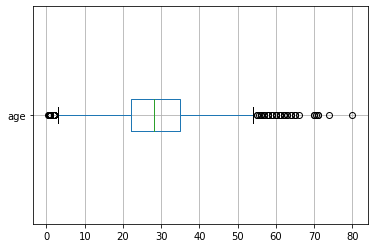

In [ ]:
dados_treino.boxplot(column='age', vert=False )

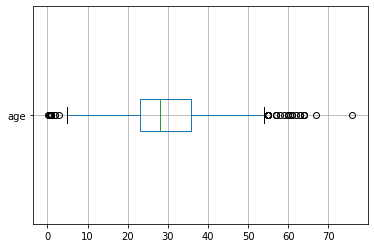

In [ ]:
dados_teste.boxplot(column='age', vert=False )

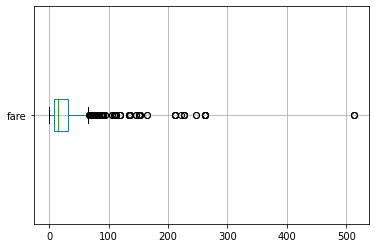

In [ ]:
dados_treino.boxplot(column='fare', vert=False )

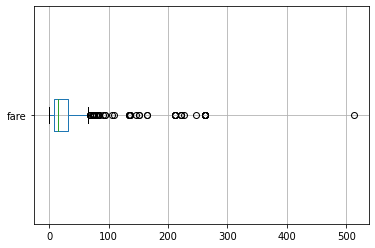

In [ ]:
dados_teste.boxplot(column='fare', vert=False )

O comportamento entre os dados de treino e teste para estas duas *features* são semelhantes, no entanto somente na *feature* 'fare' serão tratados os *outliers*. Será guardada uma cópia do *dataset* de treino e teste caso seja necessária uma aplicação futura. 

In [ ]:
# Vamos guardar uma cópia da feature 'fare' antes das transformações
guardando_treino = dados_treino.copy()

import numpy as np

# Distância interquartil:

Q1_treino = dados_treino['fare'].quantile(0.25)
Q3_treino = dados_treino['fare'].quantile(0.75)
dist_iqt_treino = Q3_treino - Q1_treino

largura_whisker = 1.5
whisker_inferior_treino = Q1_treino - (largura_whisker * dist_iqt_treino)
whisker_superior_treino = Q3_treino + (largura_whisker * dist_iqt_treino)
dados_treino['fare'] = np.where(dados_treino['fare'] > whisker_superior_treino, whisker_superior_treino, np.where(dados_treino['fare'] < whisker_inferior_treino,
                                                                                                                  whisker_inferior_treino, dados_treino['fare']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [ ]:
# Vamos guardar uma cópia da feature 'fare' antes das transformações
guardando_teste = dados_teste.copy()

# Distância interquartil:

Q1_teste = dados_teste['fare'].quantile(0.25)
Q3_teste = dados_teste['fare'].quantile(0.75)
dist_iqt_teste = Q3_teste - Q1_teste

largura_whisker = 1.5
whisker_inferior_teste = Q1_teste - (largura_whisker * dist_iqt_teste)
whisker_superior_teste = Q3_teste + (largura_whisker * dist_iqt_teste)
dados_teste['fare'] = np.where(dados_teste['fare'] > whisker_superior_teste, whisker_superior_teste, np.where(dados_teste['fare'] < whisker_inferior_teste,
                                                                                                              whisker_inferior_teste, dados_teste['fare']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


*Boxplots* representando as *features* agora sem *outliers*:

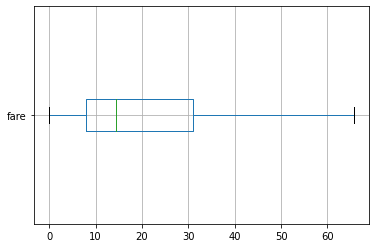

In [ ]:
dados_treino.boxplot(column='fare', vert=False )

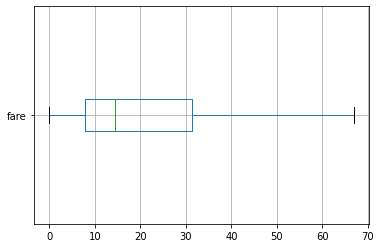

In [ ]:
dados_teste.boxplot(column='fare', vert=False )

Verificando a correlação de Pearson entre as *features* do *dataset* de treino:

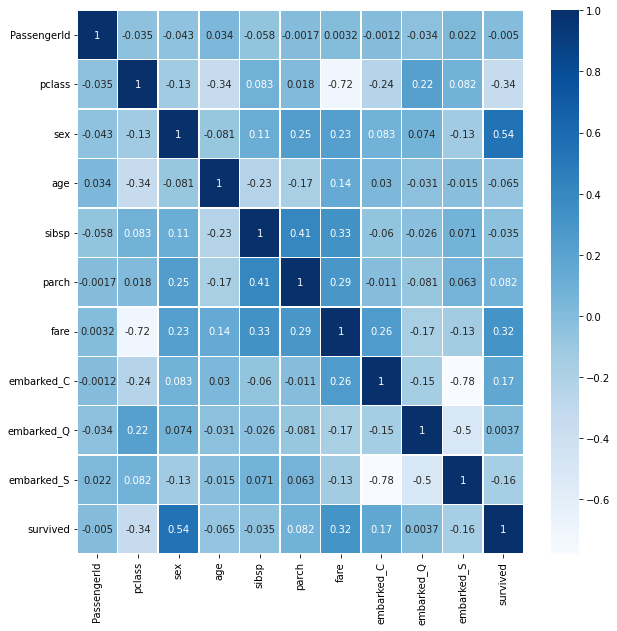

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(dados_treino.corr(), cmap = "Blues", annot=True, linewidths=.5, ax=ax)
plt.show()

Agora, vamos verificar os histogramas das *features* do *dataset* de treino:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8218b30b90>,
      dtype=object)

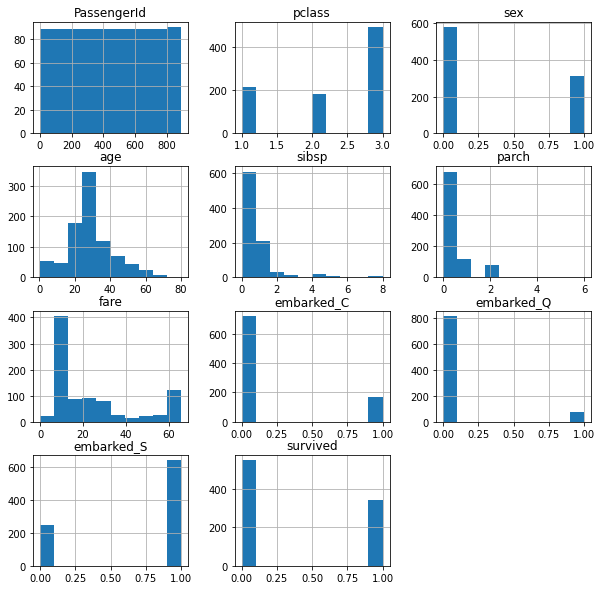

In [ ]:
dados_treino.hist(figsize = (10,10))

Agora, vamos realizar a extração dos títulos dos nomes dos passageiros, a fim de buscar uma associação entre o nome e a sobrevivência do passageiro:

In [ ]:
def extracao_titulo(df):
    df['titulo'] = df.name.apply(lambda x: x.split(',')[1].split('.')[0].strip().lower())
extracao_titulo(dados_treino)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dados_treino

,PassengerId,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked_C,embarked_Q,embarked_S,survived,titulo
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1,0,mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,65.6344,1,0,0,1,mrs
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1,miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,1,1,mrs
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1,0,mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,0,0,1,0,rev
887,888,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,0,0,1,1,miss
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,0,0,1,0,miss
889,890,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,1,0,0,1,mr


Verificando quantas vezes cada título se repete:

In [ ]:
contagem = dados_treino['titulo'].value_counts()

In [ ]:
contagem

mr              517
miss            182
mrs             125
master           40
dr                7
rev               6
mlle              2
major             2
col               2
mme               1
lady              1
ms                1
the countess      1
don               1
capt              1
jonkheer          1
sir               1
Name: titulo, dtype: int64

Vamos verificar qual a porcentagem somada dos 4 primeiros títulos em todo o *dataset* de treino, a fim de desconsiderar os outros títulos caso o valor seja acima de 90%.

In [ ]:
soma_4_primeiros = 0
for i in range(0,4,1):
    soma_4_primeiros += contagem[i]
print(soma_4_primeiros)

percentual_4_primeiros = (soma_4_primeiros/contagem.sum())*100
print(percentual_4_primeiros)

864
96.96969696969697


Com o valor próximo a 97%, consideraremos apenas os 4 primeiros títulos com mais aparições. A seguir, foram criadas variáveis para filtrar o *dataframe* a estes títulos:

In [ ]:
contem_mr = dados_treino.loc[dados_treino['titulo'] == 'mr']
contem_miss = dados_treino.loc[dados_treino['titulo'] == 'miss']
contem_mrs = dados_treino.loc[dados_treino['titulo'] == 'mrs']
contem_master = dados_treino.loc[dados_treino['titulo'] == 'master']

Verificando a porcentagem de sobrevivência para os 4 títulos:

In [ ]:
contem_mr_sobreviventes = len(contem_mr.loc[contem_mr['survived'] == 1])
percentual_mr_sobreviventes = (contem_mr_sobreviventes/len(contem_mr))*100
print('O percentual de pessoas sobreviventes com "Mr" no nome é: {0:.2f}%'.format(percentual_mr_sobreviventes))

contem_miss_sobreviventes = len(contem_miss.loc[contem_miss['survived'] == 1])
percentual_miss_sobreviventes = (contem_miss_sobreviventes/len(contem_miss))*100
print('O percentual de pessoas sobreviventes com "Miss" no nome é: {0:.2f}%'.format(percentual_miss_sobreviventes))

contem_mrs_sobreviventes = len(contem_mrs.loc[contem_mrs['survived'] == 1])
percentual_mrs_sobreviventes = (contem_mrs_sobreviventes/len(contem_mrs))*100
print('O percentual de pessoas sobreviventes com "Mrs" no nome é: {0:.2f}%'.format(percentual_mrs_sobreviventes))

contem_master_sobreviventes = len(contem_master.loc[contem_master['survived'] == 1])
percentual_master_sobreviventes = (contem_master_sobreviventes/len(contem_master))*100
print('O percentual de pessoas sobreviventes com "Master" no nome é: {0:.2f}%'.format(percentual_master_sobreviventes))

O percentual de pessoas sobreviventes com "Mr" no nome é: 15.67%
O percentual de pessoas sobreviventes com "Miss" no nome é: 69.78%
O percentual de pessoas sobreviventes com "Mrs" no nome é: 79.20%
O percentual de pessoas sobreviventes com "Master" no nome é: 57.50%


Estes percentuais acima indicam que a porcentagem de homens sobreviventes é bem abaixo da porcentagem de sobrevivência de mulheres. Buscaremos ampliar esta discussão posteriormente.

Vamos explorar a *feature* 'age'. Primeiro, verificaremos a porcentagem de crianças sobreviventes ao naufrágio (considerando como criança, o ser humano abaixo dos 12 anos de idade). Em seguida, serão verificados a respeito dos idosos, buscando responder uma das hipóteses apresentadas em "*Business Understanding*". Importante registrar que em 1912, a expectativa de vida nos Estados Unidos era de 51,5 anos para homens e 55,9 para mulheres, e portanto será considerada a idade para idosos igual ou acima dos 45 anos.

In [ ]:
criancas = dados_treino.loc[dados_treino['age'] < 12]
criancas_mortes = criancas.loc[criancas['survived'] == 0].value_counts().sum()
criancas_sobreviventes = criancas.loc[criancas['survived'] == 1].value_counts().sum()
print('O percentual de crianças sobreviventes foi de: {0:.2f}%'.format((criancas_sobreviventes/len(criancas)) *100))

O percentual de crianças sobreviventes foi de: 57.35%


In [ ]:
idosos = dados_treino.loc[dados_treino['age'] >= 45]
percentual_idosos = (len(idosos)/len(dados_treino['sex']))*100
idosos_sobreviventes = idosos.loc[idosos['survived'] == 1].value_counts().sum()
percentual_idosos_sobreviventes = (idosos_sobreviventes/len(idosos))*100

print('A quantidade de idosos no RMS Titanic era: ', len(idosos))
print('O percentual de idosos no RMS Titanic era: {0:.2f}%'.format(percentual_idosos))
print('O percentual do total de idosos no RMS Titanic que sobreviveram foi de: {0:.2f}%'.format(percentual_idosos_sobreviventes))

A quantidade de idosos no RMS Titanic era:  115
O percentual de idosos no RMS Titanic era: 12.91%
O percentual do total de idosos no RMS Titanic que sobreviveram foi de: 37.39%


Os percentuais indicam que as crianças tiveram maior probabilidade de sobrevivência, enquanto o fato de ser idoso indica menor probabilidade, confirmando assim a hipótese 1.

Agora, nos aprofundaremos nas *features* 'sex' e 'pclass'. Buscaremos entender o quanto que o gênero do passageiro e a classe no RMS Titanic influenciaram para a sua sobrevivência, a fim de respondermos as hipóteses 2 e 4. Calcularemos os percentuais em relação à todos os passageiros de um respectivo gênero ou classe. Posteriormente serão plotados gráficos para a discussão.

In [ ]:
total_homens = dados_treino.loc[dados_treino['sex'] == 0].value_counts().sum()
total_mulheres = dados_treino.loc[dados_treino['sex'] == 1].value_counts().sum()
sobreviventes = dados_treino.loc[dados_treino['survived'] == 1]
homens_sobreviventes = sobreviventes.loc[sobreviventes['sex'] == 0].value_counts().sum()
mulheres_sobreviventes = sobreviventes.loc[sobreviventes['sex'] == 1].value_counts().sum()
percentual_homens_sobreviventes = np.around(((homens_sobreviventes/total_homens)*100), decimals = 2) 
percentual_mulheres_sobreviventes = np.around(((mulheres_sobreviventes/total_mulheres)*100), decimals = 2)
lista_sex = [0,1]
lista_sex_sobreviventes = [percentual_homens_sobreviventes, percentual_mulheres_sobreviventes]

total_classe1 = dados_treino.loc[dados_treino['pclass'] == 1].value_counts().sum()
total_classe2 = dados_treino.loc[dados_treino['pclass'] == 2].value_counts().sum()
total_classe3 = dados_treino.loc[dados_treino['pclass'] == 3].value_counts().sum()
classe1_sobreviventes = sobreviventes.loc[sobreviventes['pclass'] == 1].value_counts().sum()
classe2_sobreviventes = sobreviventes.loc[sobreviventes['pclass'] == 2].value_counts().sum()
classe3_sobreviventes = sobreviventes.loc[sobreviventes['pclass'] == 3].value_counts().sum()
percentual_classe1_sobreviventes = np.around(((classe1_sobreviventes/total_classe1)*100), decimals = 2) 
percentual_classe2_sobreviventes = np.around(((classe2_sobreviventes/total_classe2)*100), decimals = 2)
percentual_classe3_sobreviventes = np.around(((classe3_sobreviventes/total_classe3)*100), decimals = 2)
lista_classe = [1,2,3]
lista_classe_sobreviventes = [percentual_classe1_sobreviventes, percentual_classe2_sobreviventes, percentual_classe3_sobreviventes]


Pela hipótese 3, desejamos compreender o quanto que o fato de uma pessoa possuir parentes/pessoas próximas auxiliou em sua sobrevivência ou não. Para obter a resposta, tomaremos uma cópia dos dados de treino e guardaremos em um novo objeto. Após, será criada uma coluna que contém a soma das colunas 'sibsp' e 'parch':

In [ ]:
sibparch = dados_treino.copy()

In [ ]:
sibparch['sibsp + parch'] = sibparch['sibsp'] + sibparch['parch']
sibparch.drop(['sibsp', 'parch', 'titulo'], axis = 1, inplace = True)
sibparch

,PassengerId,pclass,name,sex,age,ticket,fare,embarked_C,embarked_Q,embarked_S,survived,sibsp + parch
0,1,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,65.6344,1,0,0,1,1
2,3,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,0,0,1,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,0,0,1,1,1
4,5,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",0,27.0,211536,13.0000,0,0,1,0,0
887,888,1,"Graham, Miss. Margaret Edith",1,19.0,112053,30.0000,0,0,1,1,0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,W./C. 6607,23.4500,0,0,1,0,3
889,890,1,"Behr, Mr. Karl Howell",0,26.0,111369,30.0000,1,0,0,1,0


Agora, coletaremos as informações do total de passageiros que tinham um número x de parentes/pessoas próximas:

In [ ]:
soma_sibparch = sibparch['sibsp + parch'].value_counts()

In [ ]:
soma_sibparch

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: sibsp + parch, dtype: int64

Coletaremos também o total de sobreviventes para cada total de parentes/pessoas próximas, a fim de obtermos o percentual de sobreviventes para esta situação. Em suma, como exemplo, estamos respondendo a pergunta: "Se um passageiro tem 3 parentes/pessoas próximas, qual a porcentagem de sobreviventes dentre todos os que possuem 3 parentes/pessoas próximas?" Posteriormente será plotado um gráfico para a resposta.

In [ ]:
total_0 = soma_sibparch[0]
total_1 = soma_sibparch[1]
total_2 = soma_sibparch[2]
total_3 = soma_sibparch[3]
total_4 = soma_sibparch[4]
total_5 = soma_sibparch[5]
total_6 = soma_sibparch[6]
total_7 = soma_sibparch[7]
total_10 = soma_sibparch[10]

sobreviventes2 = sibparch.loc[sibparch['survived'] == 1]
total_0_sobreviventes = sobreviventes2.loc[sobreviventes2['sibsp + parch'] == 0].value_counts().sum()
total_1_sobreviventes = sobreviventes2.loc[sobreviventes2['sibsp + parch'] == 1].value_counts().sum()
total_2_sobreviventes = sobreviventes2.loc[sobreviventes2['sibsp + parch'] == 2].value_counts().sum()
total_3_sobreviventes = sobreviventes2.loc[sobreviventes2['sibsp + parch'] == 3].value_counts().sum()
total_4_sobreviventes = sobreviventes2.loc[sobreviventes2['sibsp + parch'] == 4].value_counts().sum()
total_5_sobreviventes = sobreviventes2.loc[sobreviventes2['sibsp + parch'] == 5].value_counts().sum()
total_6_sobreviventes = sobreviventes2.loc[sobreviventes2['sibsp + parch'] == 6].value_counts().sum()
total_7_sobreviventes = sobreviventes2.loc[sobreviventes2['sibsp + parch'] == 7].value_counts().sum()
total_10_sobreviventes = sobreviventes2.loc[sobreviventes2['sibsp + parch'] == 10].value_counts().sum()

percentual_total_0_sobreviventes = np.around(((total_0_sobreviventes/total_0)*100), decimals = 2)
percentual_total_1_sobreviventes = np.around(((total_1_sobreviventes/total_1)*100), decimals = 2)
percentual_total_2_sobreviventes = np.around(((total_2_sobreviventes/total_2)*100), decimals = 2)
percentual_total_3_sobreviventes = np.around(((total_3_sobreviventes/total_3)*100), decimals = 2)
percentual_total_4_sobreviventes = np.around(((total_4_sobreviventes/total_4)*100), decimals = 2)
percentual_total_5_sobreviventes = np.around(((total_5_sobreviventes/total_5)*100), decimals = 2)
percentual_total_6_sobreviventes = np.around(((total_6_sobreviventes/total_6)*100), decimals = 2)
percentual_total_7_sobreviventes = np.around(((total_7_sobreviventes/total_7)*100), decimals = 2)
percentual_total_10_sobreviventes = np.around(((total_10_sobreviventes/total_10)*100), decimals = 2)

lista_sibparch = [0,1,2,3,4,5,6,7,10]
lista_sibparch_sobreviventes = [percentual_total_0_sobreviventes, percentual_total_1_sobreviventes, percentual_total_2_sobreviventes, percentual_total_3_sobreviventes,
                                percentual_total_4_sobreviventes, percentual_total_5_sobreviventes, percentual_total_6_sobreviventes, percentual_total_7_sobreviventes,
                                percentual_total_10_sobreviventes]

A seguir serão plotados os gráficos a fim de respondermos as hipóteses 2,3 e 4:

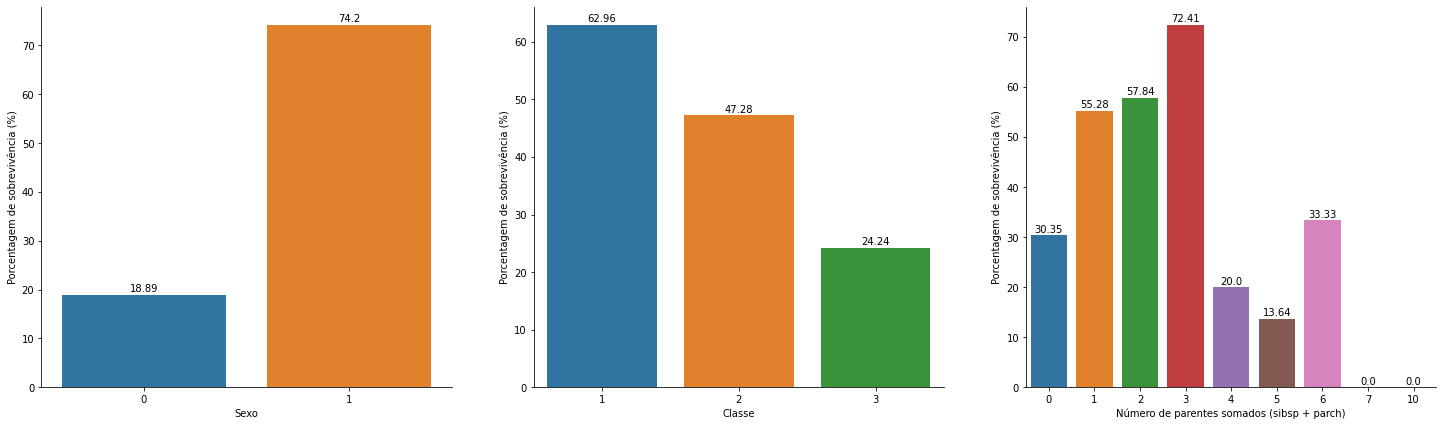

In [ ]:
import matplotlib as mpl

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize = (25,7))

plot1 = sns.barplot(x = lista_sex, y = lista_sex_sobreviventes, data = dados_treino, ax = axis1, ci = None)
plot2 = sns.barplot(x = lista_classe, y = lista_classe_sobreviventes, data = dados_treino, ax = axis2, ci = None)
plot3 = sns.barplot(x = lista_sibparch, y = lista_sibparch_sobreviventes, data = sibparch, ax = axis3, ci = None)

plot1.set(xlabel='Sexo', ylabel='Porcentagem de sobrevivência (%)')
plot2.set(xlabel='Classe', ylabel='Porcentagem de sobrevivência (%)')
plot3.set(xlabel='Número de parentes somados (sibsp + parch)', ylabel='Porcentagem de sobrevivência (%)')

for i in plot1.patches:
    plot1.annotate(i.get_height(), (i.get_x() + i.get_width()/2, i.get_height()),
                 ha = 'center', va = 'baseline', fontsize = 10, color = 'black', xytext = (0,3), textcoords = 'offset points')
    
for i in plot2.patches:
    plot2.annotate(i.get_height(), (i.get_x() + i.get_width()/2, i.get_height()),
                 ha = 'center', va = 'baseline', fontsize = 10, color = 'black', xytext = (0,3), textcoords = 'offset points')
    
for i in plot3.patches:
    plot3.annotate(i.get_height(), (i.get_x() + i.get_width()/2, i.get_height()),
                 ha = 'center', va = 'baseline', fontsize = 10, color = 'black', xytext = (0,3), textcoords = 'offset points')
    
plt.show()

Os gráficos acima contém alguns fatos:
- Conforme notado anteriormente na análise por títulos, realmente a porcentagem de homens sobreviventes é bem abaixo da porcentagem de mulheres sobreviventes, confirmando a hipótese 2;
- A classe do passageiro pesou para a sua sobrevivência. Quanto menos favorecida a classe, menor a probabilidade de sobrevivência, confirmando a hipótese 4;
- A porcentagem de sobreviventes em relação ao número de parentes/pessoas próximas não contém um padrão notório, e pelas informações contidas no objeto 'soma_sibparch', tem-se uma concentração maior de passageiros com 1,2 ou 3 parentes/pessoas próximas, o que gera um desbalanceamento na análise. Portanto não é possível afirmar se esta *feature* nos fornece uma informação precisa para confirmar ou rejeitar a hipótese 3.  

# Modeling

Vamos para a etapa de modelagem, onde faremos os últimos ajustes antes da aplicação dos algoritmos de *machine learning*. Guardaremos uma cópia dos dados de treino e teste da *feature* 'PassengerId' e excluiremos as *features*: 'name', 'ticket', 'titulo', 'embarked_C', 'embarked_Q' e 'embarked_S'. 

In [ ]:
passenger_id_treino = dados_treino['PassengerId'].copy()
passenger_id_teste = dados_teste['PassengerId'].copy()
dados_treino.drop(['PassengerId', 'name', 'ticket', 'titulo', 'embarked_C','embarked_Q','embarked_S'], axis = 1, inplace = True)
dados_teste.drop(['PassengerId', 'name', 'ticket', 'embarked_C','embarked_Q','embarked_S'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# ML Algorithms

Vamos aplicar dois algoritmos neste trabalho: Random Forest Classifier e Gradient Boosting Classifier. Faremos a divisão da variável alvo 'survived' das preditoras logo abaixo:

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
x_train = dados_treino.drop(['survived'], axis = 1)
y_train = dados_treino['survived']

x_test = dados_teste

In [ ]:
x_train.head()

,pclass,sex,age,sibsp,parch,fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,65.6344
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


In [ ]:
x_test.head()

,pclass,sex,age,sibsp,parch,fare
891,3,0,34.5,0,0,7.8292
892,3,1,47.0,1,0,7.0000
893,2,0,62.0,0,0,9.6875
894,3,0,27.0,0,0,8.6625
895,3,1,22.0,1,1,12.2875


Aplicando os modelos Random Forest Classifier e Gradient Boosting Classifier aos dados de treino apenas com a definição de 100 estimadores e realizando previsões com os dados de teste: 

In [ ]:
modeloRF = RandomForestClassifier(n_estimators = 100, random_state = 0)
modeloRF.fit(x_train,y_train)

pred_rf = modeloRF.predict(x_test)

modeloGB = GradientBoostingClassifier(n_estimators = 100, random_state = 0)
modeloGB.fit(x_train,y_train)

pred_gb = modeloGB.predict(x_test)

A seguir, veremos as importâncias de cada *feature* para os treinamentos dos modelos escolhidos:

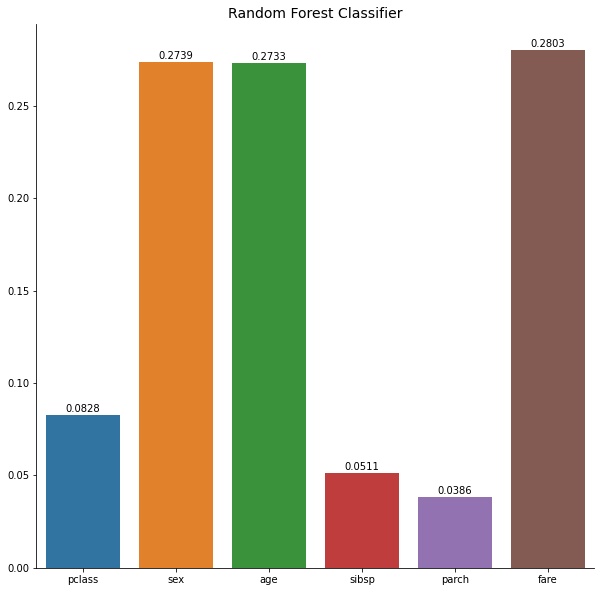

In [ ]:
feat_import_rf = np.around(modeloRF.feature_importances_, decimals = 4)

plt.figure(figsize=(10, 10))
plot = sns.barplot(x = x_train.columns, y= feat_import_rf)
for i in plot.patches:
    plot.annotate(i.get_height(), (i.get_x() + i.get_width()/2, i.get_height()),
                 ha = 'center', va = 'baseline', fontsize = 10, color = 'black', xytext = (0,3), textcoords = 'offset points')
plt.title('Random Forest Classifier', fontsize = 14)
plt.show()

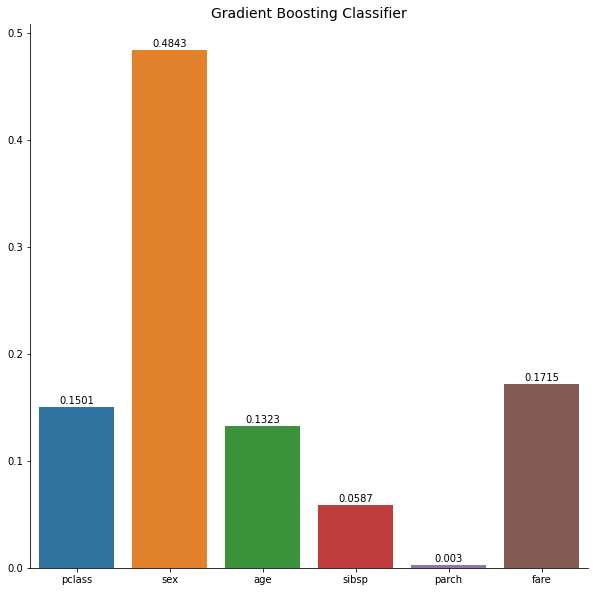

In [ ]:
feat_import_gb = np.around(modeloGB.feature_importances_, decimals = 4)

plt.figure(figsize=(10, 10))
plot = sns.barplot(x = x_train.columns, y= feat_import_gb)
for i in plot.patches:
    plot.annotate(i.get_height(), (i.get_x() + i.get_width()/2, i.get_height()),
                 ha = 'center', va = 'baseline', fontsize = 10, color = 'black', xytext = (0,3), textcoords = 'offset points')
plt.title('Gradient Boosting Classifier', fontsize = 14)
plt.show()

Vamos agora realizar a submeção destas previsões na competição do *Kaggle*, transformando em um arquivo csv:

In [ ]:
submit_kaggle_rf = pd.Series(pred_rf, index = passenger_id_teste, name = 'survived')
submit_kaggle_rf.to_csv("modelo_rf_Igor.csv", header = True)

Verificando as 10 primeiras linhas das previsões do 1º modelo Random Forest Classifier:

In [ ]:
!head -n10 modelo_rf_Igor.csv

PassengerId,survived
892,0
893,0
894,1
895,1
896,0
897,0
898,0
899,0
900,1


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

A seguir, a demonstração do *score* na competição e logo abaixo a posição na classificação geral:

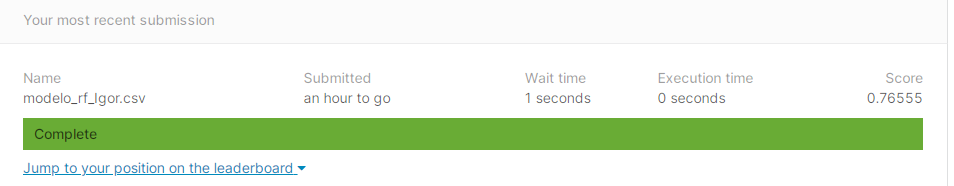

In [ ]:
score_rf = cv2.imread('/content/ScoreRF.PNG')
cv2_imshow(score_rf)

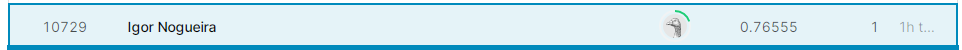

In [ ]:
position_rf = cv2.imread('/content/PositionRF.PNG')
cv2_imshow(position_rf)

Procedimento idêntico foi realizado para o 1º modelo Gradient Boosting Classifier:

In [ ]:
submit_kaggle_gb = pd.Series(pred_gb, index = passenger_id_teste, name = 'survived')
submit_kaggle_gb.to_csv("modelo_gb_Igor.csv", header = True)

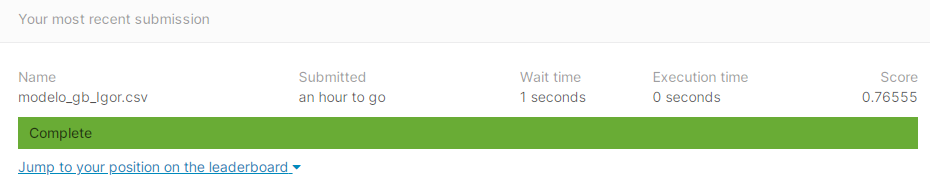

In [ ]:
score_gb = cv2.imread('/content/ScoreGB.PNG')
cv2_imshow(score_gb)

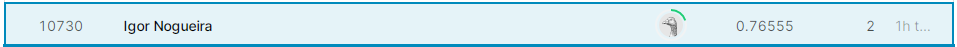

In [ ]:
position_gb = cv2.imread('/content/PositionGB.PNG')
cv2_imshow(position_gb)

Vamos buscar uma melhora da performance do modelo, incluindo o *split* dos dados em 5 *folds*, aplicando validação cruzada e aumentando o número de estimadores para 200. Também, especificaremos mais 3 parâmetros: 'min_samples_split', 'max_depth' e min_samples_leaf'. Todo o procedimento para submeção dos resultados na competição foi realizada igualmente aos modelos anteriores.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
modeloRF2 = RandomForestClassifier(n_estimators = 200, min_samples_split = 2, max_depth = 3, min_samples_leaf = 2, random_state = 0)
Skfold = StratifiedKFold(n_splits = 5, shuffle = True)
resultadoRF = cross_val_score(modeloRF2,x_train,y_train,cv = Skfold, n_jobs = -1)
print(resultadoRF.mean())

0.8137530600715586


In [ ]:
modeloRF2.fit(x_train,y_train)
pred_rf2 = modeloRF2.predict(x_test)

In [ ]:
modeloGB2 = GradientBoostingClassifier(n_estimators = 200, min_samples_split = 2, max_depth = 3, min_samples_leaf = 2, random_state = 0)
SkfoldGB = StratifiedKFold(n_splits = 5, shuffle = True)
resultadoGB = cross_val_score(modeloGB2,x_train,y_train,cv = Skfold, n_jobs = -1)
print(resultadoGB.mean())

0.8204318624066286


In [ ]:
modeloGB2.fit(x_train,y_train)
pred_gb2 = modeloGB2.predict(x_test)

In [ ]:
submit_kaggle_rf2 = pd.Series(pred_rf2, index = passenger_id_teste, name = 'survived')
submit_kaggle_rf2.to_csv("modelo_rf2_Igor.csv", header = True)

submit_kaggle_gb2 = pd.Series(pred_gb2, index = passenger_id_teste, name = 'survived')
submit_kaggle_gb2.to_csv("modelo_gb2_Igor.csv", header = True)

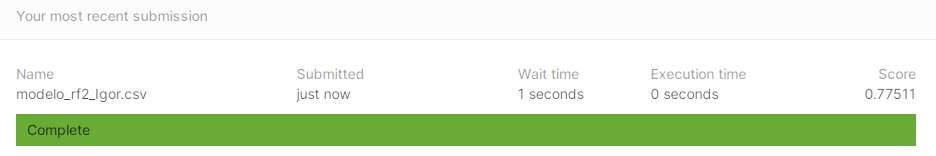

In [ ]:
score_rf2 = cv2.imread('/content/ScoreRF2.PNG')
cv2_imshow(score_rf2)

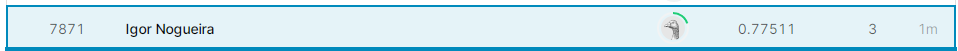

In [ ]:
position_rf2 = cv2.imread('/content/PositionRF2.PNG')
cv2_imshow(position_rf2)

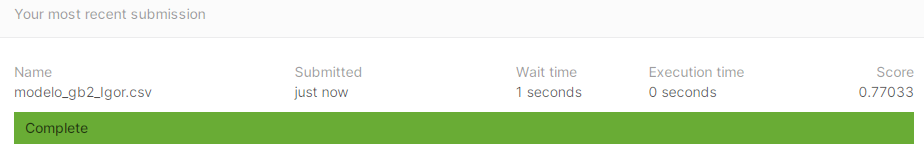

In [ ]:
score_gb2 = cv2.imread('/content/ScoreGB2.PNG')
cv2_imshow(score_gb2)

Após acréscimo de mais atributos, separando os dados em 5 *folds* e aplicando validação cruzada, foi obtida uma leve melhora nos *scores*. Agora, vamos buscar melhorar nossos modelos pela variação dos parâmetros: 

In [ ]:
from sklearn.model_selection import GridSearchCV

minimos_splitRF = np.array([2,3,4,5,6])
maximo_nivelRF = np.array([3,4,5,6,7])
minimo_leafRF = np.array([2,3,4,5,6])
valores_gridRF = {'min_samples_split': minimos_splitRF, 'max_depth': maximo_nivelRF, 'min_samples_leaf': minimo_leafRF}

modeloRF3 = RandomForestClassifier(n_estimators = 200, n_jobs = -1, random_state = 0)

gridRandomForest = GridSearchCV(estimator = modeloRF3, param_grid = valores_gridRF, cv = 5, n_jobs = -1)
gridRandomForest.fit(x_train,y_train)

print('Mínimo split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Máxima profundidade: ', gridRandomForest.best_estimator_.max_depth)
print('Mínimo leaf: ', gridRandomForest.best_estimator_.min_samples_leaf)


minimos_splitGB = np.array([2,3,4,5,6])
maximo_nivelGB = np.array([3,4,5,6,7])
minimo_leafGB = np.array([2,3,4,5,6])
valores_gridGB = {'min_samples_split': minimos_splitGB, 'max_depth': maximo_nivelGB, 'min_samples_leaf': minimo_leafGB}

modeloGB3 = GradientBoostingClassifier(n_estimators = 200, random_state = 0)

gridGB = GridSearchCV(estimator = modeloGB3, param_grid = valores_gridGB, cv = 5, n_jobs = -1)
gridGB.fit(x_train,y_train)

print('Mínimo split: ', gridGB.best_estimator_.min_samples_split)
print('Máxima profundidade: ', gridGB.best_estimator_.max_depth)
print('Mínimo leaf: ', gridGB.best_estimator_.min_samples_leaf)

Mínimo split:  2
Máxima profundidade:  7
Mínimo leaf:  2
Mínimo split:  2
Máxima profundidade:  3
Mínimo leaf:  2


In [ ]:
modeloRF4 = RandomForestClassifier(n_estimators = 200, min_samples_split = 2, max_depth = 7, min_samples_leaf = 2, random_state = 0)
SkfoldRF4 = StratifiedKFold(n_splits = 5, shuffle = True)
resultadoRF4 = cross_val_score(modeloRF4, x_train, y_train, cv = SkfoldRF4, n_jobs = -1)
print(resultadoRF4.mean())

modeloRF4.fit(x_train,y_train)
pred_rf4 = modeloRF4.predict(x_test)

0.8293704098926622


In [ ]:
modeloGB4 = GradientBoostingClassifier(n_estimators = 200, min_samples_split = 2, max_depth = 3, min_samples_leaf = 2)
SkfoldGB4 = StratifiedKFold(n_splits = 5, shuffle = True)
resultadoGB4 = cross_val_score(modeloGB4, x_train, y_train, cv = SkfoldGB4, n_jobs = -1)
print(resultadoGB4.mean())

modeloGB4.fit(x_train,y_train)
pred_gb4 = modeloGB4.predict(x_test)

0.8361433682756889


In [ ]:
submit_kaggle_rf4 = pd.Series(pred_rf4, index = passenger_id_teste, name = 'survived')
submit_kaggle_rf4.to_csv("modelo_rf4_Igor.csv", header = True)

submit_kaggle_gb4 = pd.Series(pred_gb4, index = passenger_id_teste, name = 'survived')
submit_kaggle_gb4.to_csv("modelo_gb4_Igor.csv", header = True)

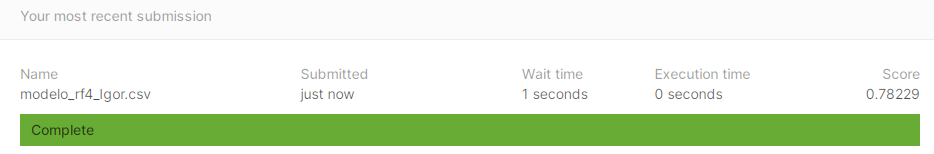

In [ ]:
score_rf4 = cv2.imread('/content/ScoreRF4.PNG')
cv2_imshow(score_rf4)

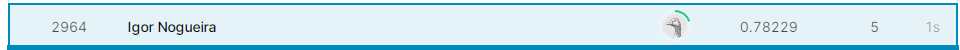

In [ ]:
position_rf4 = cv2.imread('/content/PositionRF4.PNG')
cv2_imshow(position_rf4)

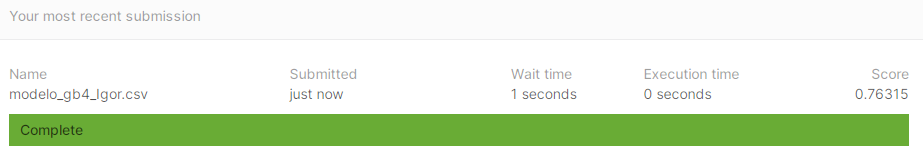

In [ ]:
score_gb4 = cv2.imread('/content/ScoreGB4.PNG')
cv2_imshow(score_gb4)

Após escolha dos melhores parâmetros foi obtido o melhor resultado, com o *score* de 0.78229 para o modelo utilizando Random Forest Classifier. Porém, para o modelo utilizando Gradient Boosting Classifier o melhor resultado foi 0.77033 alcançado no teste anterior.